In [437]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [438]:
crc_seer_df = pd.read_csv("CRC_SEER_Modified.csv")

In [439]:
crc_seer_df

,Year of diagnosis,"Race recode (W, B, AI, API)",Sex,Age recode with single ages and 100+,Survival months,Marital status at diagnosis,target
0,2000,White,Male,82 years,17,Married (including common law),1
1,2000,White,Male,76 years,67,Unknown,1
2,2000,White,Female,65 years,41,Unknown,1
3,2000,White,Male,86 years,15,Unknown,1
4,2000,White,Female,82 years,0,Unknown,1
...,...,...,...,...,...,...,...
29996,2016,White,Female,73 years,28,Married (including common law),0
29997,2016,White,Female,63 years,28,Married (including common law),0
29998,2016,White,Female,82 years,28,Single (never married),0
29999,2016,White,Female,44 years,29,Married (including common law),0


In [440]:
# Renaming columns
crc_seer_df.rename(columns={
    'Year of diagnosis': 'Year',
    'Race recode (W, B, AI, API)': 'Race',
    'Survival months': 'SurvivalMonths',
    'Marital status at diagnosis': 'MaritalStatus',
    'target': 'Survival Recode'
}, inplace=True)

In [441]:
crc_seer_df

,Year,Race,Sex,Age recode with single ages and 100+,SurvivalMonths,MaritalStatus,Survival Recode
0,2000,White,Male,82 years,17,Married (including common law),1
1,2000,White,Male,76 years,67,Unknown,1
2,2000,White,Female,65 years,41,Unknown,1
3,2000,White,Male,86 years,15,Unknown,1
4,2000,White,Female,82 years,0,Unknown,1
...,...,...,...,...,...,...,...
29996,2016,White,Female,73 years,28,Married (including common law),0
29997,2016,White,Female,63 years,28,Married (including common law),0
29998,2016,White,Female,82 years,28,Single (never married),0
29999,2016,White,Female,44 years,29,Married (including common law),0


In [442]:
crc_seer_df['Age recode with single ages and 100+'] = crc_seer_df['Age recode with single ages and 100+'].str.replace(' years', '')
crc_seer_df['Age recode with single ages and 100+'] = crc_seer_df['Age recode with single ages and 100+'].str.replace('100+', '101')

for i, value in enumerate(crc_seer_df['Age recode with single ages and 100+']):
    if value.endswith('+'):
        crc_seer_df.at[i, 'Age recode with single ages and 100+'] = str(int(value[:-1]) + 1)

crc_seer_df['Age recode with single ages and 100+'] = pd.to_numeric(crc_seer_df['Age recode with single ages and 100+'])
mean_survival_months = np.mean(crc_seer_df[crc_seer_df['SurvivalMonths'] != 'Unknown']['SurvivalMonths'].astype(float))
crc_seer_df['SurvivalMonths'] = crc_seer_df['SurvivalMonths'].replace('Unknown', mean_survival_months)
crc_seer_df['SurvivalMonths'] = pd.to_numeric(crc_seer_df['SurvivalMonths'])

race_recode = {
    'White': 1,
    'Black': 2,
    'Asian or Pacific Islander': 3,
    'American Indian/Alaska Native': 4,
    'Hispanic': 5,
    'Unknown': 6
}
crc_seer_df['Race'] = crc_seer_df['Race'].map(race_recode)
sex_recode = {
    'Male': 1,
    'Female': 0
}
crc_seer_df['Sex'] = crc_seer_df['Sex'].map(sex_recode)
marital_recode = {
    'Married (including common law)': 1,
    'Single (never married)': 2,
    'Divorced': 3,
    'Widowed': 4,
    'Unknown': 5
}
crc_seer_df['MaritalStatus'] = crc_seer_df['MaritalStatus'].map(marital_recode)

print(crc_seer_df)

       Year  Race  Sex  Age recode with single ages and 100+  SurvivalMonths  \
0      2000     1    1                                    82            17.0   
1      2000     1    1                                    76            67.0   
2      2000     1    0                                    65            41.0   
3      2000     1    1                                    86            15.0   
4      2000     1    0                                    82             0.0   
...     ...   ...  ...                                   ...             ...   
29996  2016     1    0                                    73            28.0   
29997  2016     1    0                                    63            28.0   
29998  2016     1    0                                    82            28.0   
29999  2016     1    0                                    44            29.0   
30000  2016     3    1                                    52            29.0   

       MaritalStatus  Survival Recode  

In [443]:
crc_seer_recoded_df = crc_seer_df.copy()
crc_seer_recoded_df.fillna(crc_seer_recoded_df.mean(), inplace=True)
X = crc_seer_recoded_df.loc[:,crc_seer_recoded_df.columns != 'Survival Recode']
y = crc_seer_recoded_df.loc[:,crc_seer_recoded_df.columns =='Survival Recode']

In [444]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Degree 2 Polynomial: RMSE = 0.4568078712644054
Confusion Matrix: [[4173    0]
 [1828    0]]


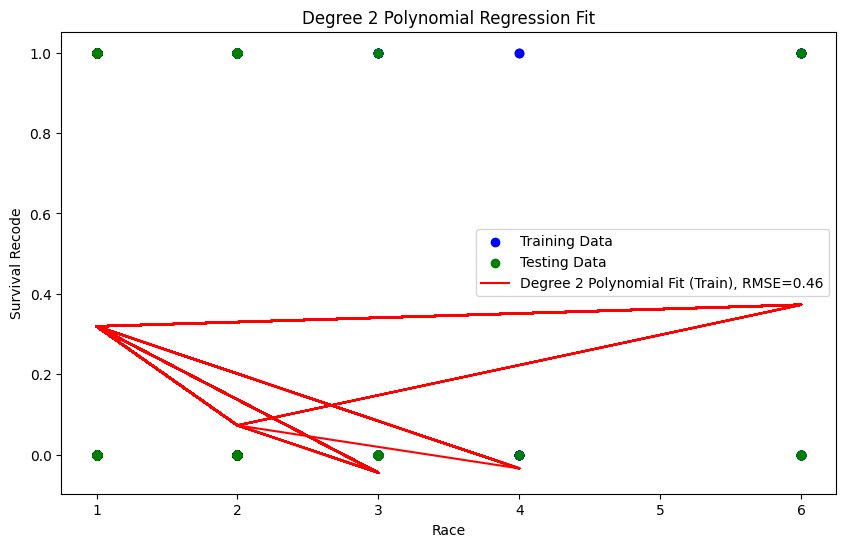

Degree 3 Polynomial: RMSE = 0.4568326772812612
Confusion Matrix: [[4173    0]
 [1828    0]]


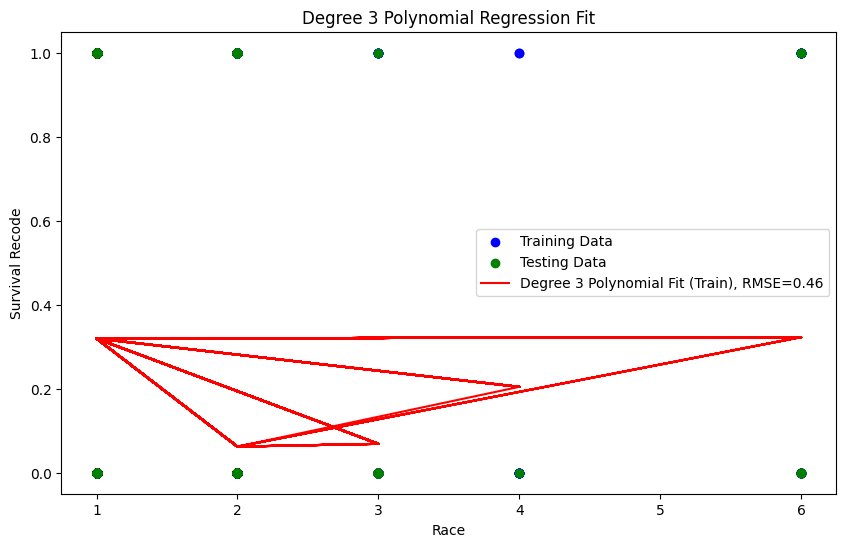

Degree 5 Polynomial: RMSE = 0.4568334695396282
Confusion Matrix: [[4173    0]
 [1828    0]]


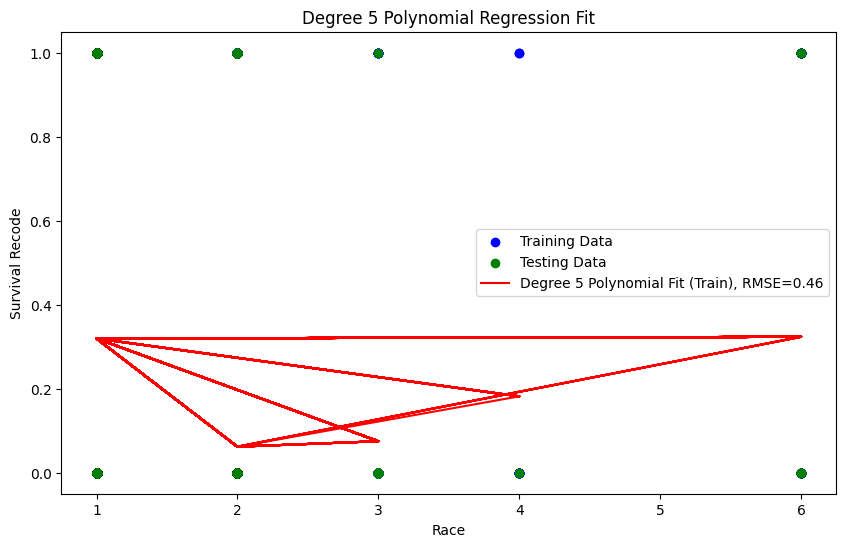

Best polynomial degree: 2, RMSE: 0.4568078712644054


In [445]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Polynomial regression for degrees 2, 3, and 5
degrees = [2, 3, 5]
rmse_scores = []

for degree in degrees:
    # Fit polynomial regression
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train['Race'].values.reshape(-1, 1))
    X_test_poly = poly_features.transform(X_test['Race'].values.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_poly)

    # Calculate RMSE
    rmse = calculate_rmse(y_test, y_pred)
    rmse_scores.append(rmse)
    print(f"Degree {degree} Polynomial: RMSE = {rmse}")

    y_pred_binary = (y_pred > 0.5).astype(int)  # Convert predicted probabilities to binary predictions
    print("Confusion Matrix:",confusion_matrix(y_test, y_pred_binary))

    # Plot polynomial fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train['Race'], y_train, color='blue', label='Training Data')
    plt.scatter(X_test['Race'], y_test, color='green', label='Testing Data')
    plt.plot(X_train['Race'], model.predict(X_train_poly), label=f'Degree {degree} Polynomial Fit (Train), RMSE={rmse:.2f}', color='red')
    plt.xlabel('Race')
    plt.ylabel('Survival Recode')
    plt.title(f'Degree {degree} Polynomial Regression Fit')
    plt.legend()
    plt.show()

# Find the best polynomial (lowest RMSE)
best_degree = degrees[np.argmin(rmse_scores)]
best_rmse = np.min(rmse_scores)
print(f"Best polynomial degree: {best_degree}, RMSE: {best_rmse}")


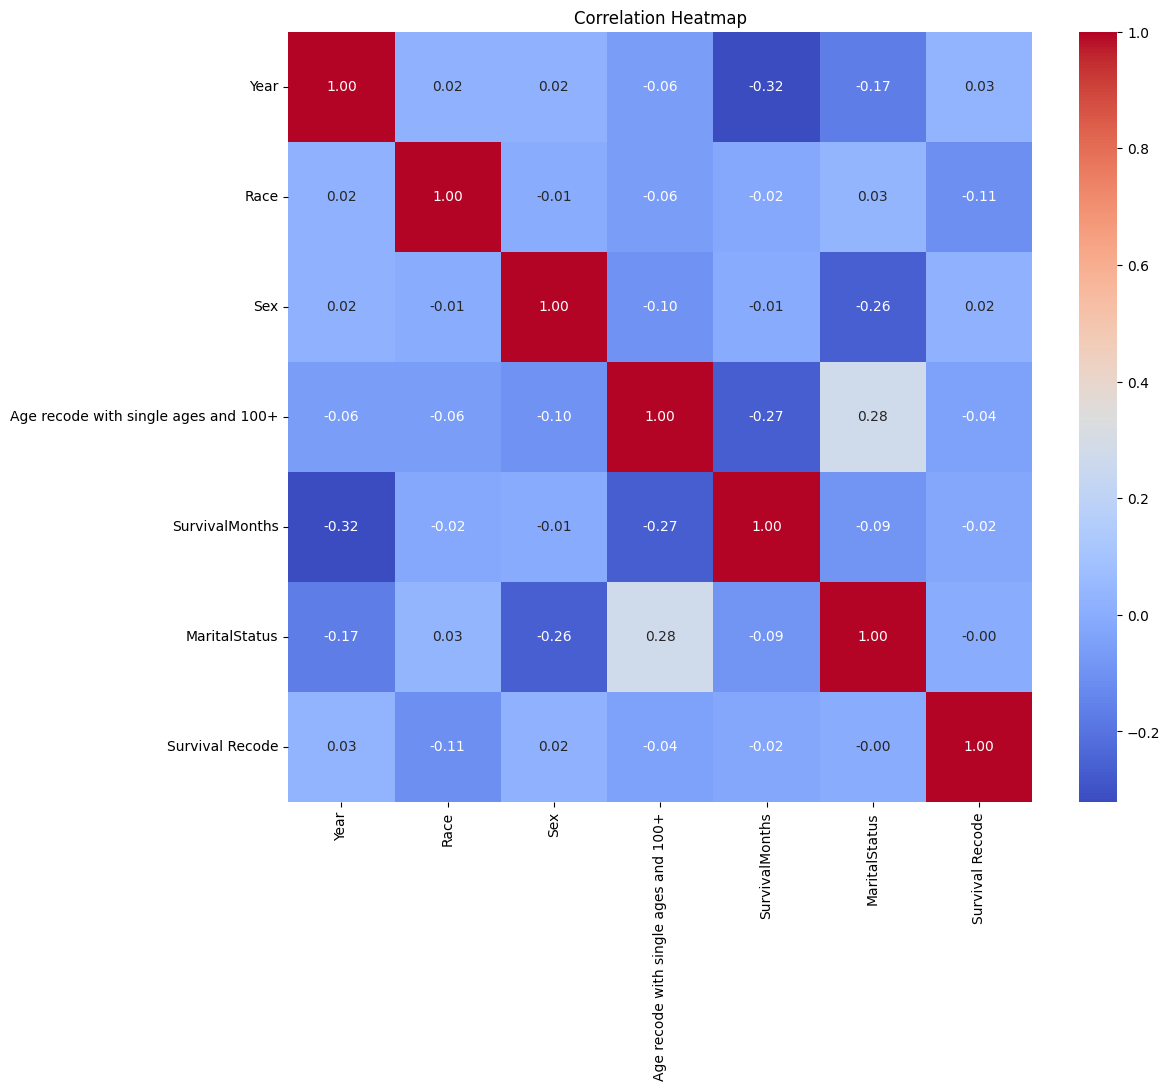

Features in decreasing order of impact with respect to Survival Recode:
Year                                    0.027798
Sex                                     0.016024
MaritalStatus                          -0.004507
SurvivalMonths                         -0.023131
Age recode with single ages and 100+   -0.044191
Race                                   -0.113970
Name: Survival Recode, dtype: float64


In [446]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crc_seer_recoded_df is your updated DataFrame
# Create a correlation matrix
corr_matrix = crc_seer_recoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# List features in decreasing order of impact with respect to Survival Recode
# Remove 'Survival Recode' from the list as it will always have correlation 1.0 with itself
correlation_with_survival = corr_matrix['Survival Recode'].drop('Survival Recode').sort_values(ascending=False)
print("Features in decreasing order of impact with respect to Survival Recode:")
print(correlation_with_survival)


Solver: newton-cg, Accuracy: 0.6953841026495584
Confusion Matrix (Solver: newton-cg):
[[4173    0]
 [1828    0]]


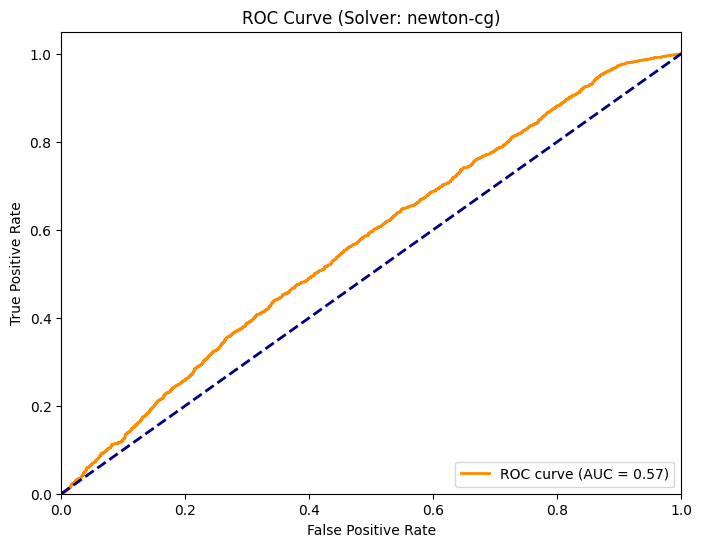

Solver: lbfgs, Accuracy: 0.6953841026495584
Confusion Matrix (Solver: lbfgs):
[[4173    0]
 [1828    0]]


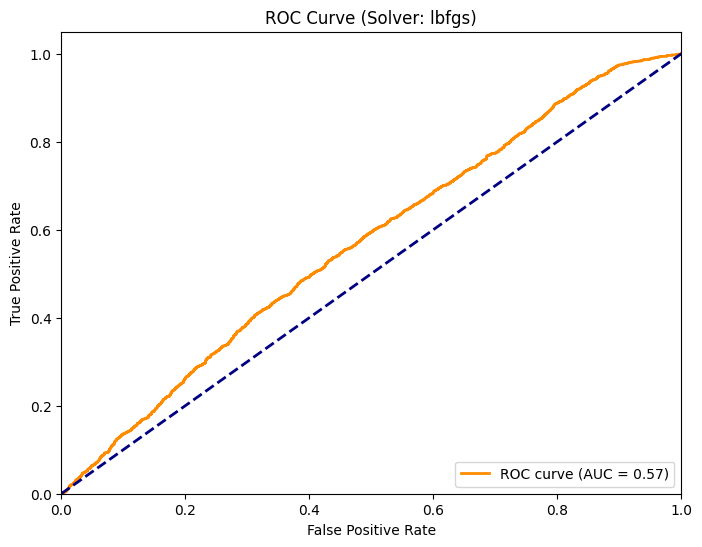

Solver: liblinear, Accuracy: 0.6953841026495584
Confusion Matrix (Solver: liblinear):
[[4173    0]
 [1828    0]]


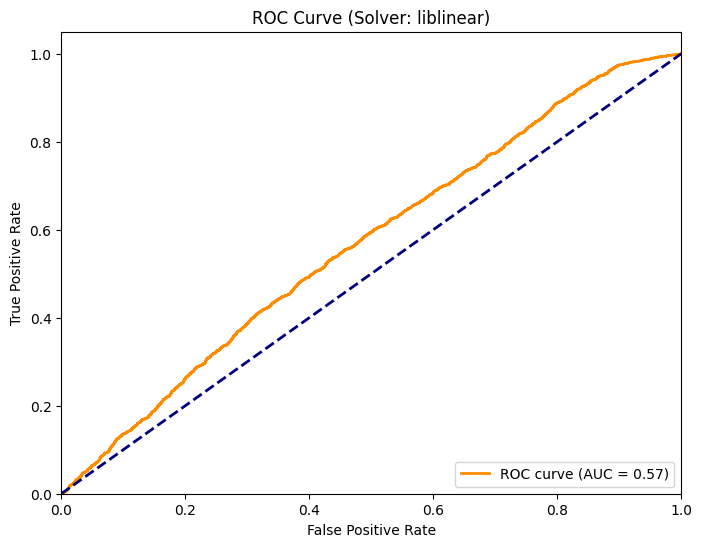

In [447]:
# Assignment 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
solvers = ['newton-cg', 'lbfgs', 'liblinear']

for solver in solvers:
    # Fit logistic regression model
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Solver: {solver}, Accuracy: {accuracy}")

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix (Solver: {solver}):')
    print(cm)

    # Plot ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Solver: {solver})')
    plt.legend(loc="lower right")
    plt.show()


Final Report:

Logistic Regression:
All three logistic regression models trained with the solvers (liblinear, lbfgs, and newton-cg) have the same accuracy of approximately 69.54%. All three models have a confusion matrix with all predictions falling under the negative class (i.e., no positive predictions).


Polynomial Regression:All polynomial regression models have almost same RMSE values which indicates similar performance regarding teh target variable.

Both the polynomial regression and the logistic regression has the same confusion matrices which indicates their performances are identical.


From the heatmap, the variable 'Age recode with single ages and 100+' has a strong negative correlation (approximately -0.27) with 'SurvivalMonths'.
'MaritalStatus' has a moderate positive correlation with 'Age recode with single ages and 100+' (approximately 0.28)
